<a href="https://colab.research.google.com/github/SUBHRA15012001/Subhra-VS/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
## Importing Pnemonia dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/brain-mri-images-for-brain-tumor-detection.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

brain-mri-images-for-brain-tumor-detection.zip	kaggle.json  sample_data
brain_tumor_dataset				no	     yes


In [8]:
## Importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_tumour_files = os.listdir('/content/brain_tumor_dataset/yes')
print (with_tumour_files[0:5])
print(with_tumour_files[-5:])

['Y61.jpg', 'Y71.JPG', 'Y2.jpg', 'Y16.JPG', 'Y62.jpg']
['Y3.jpg', 'Y90.jpg', 'Y164.JPG', 'Y154.jpg', 'Y157.JPG']


In [10]:
without_tumour_files = os.listdir('/content/brain_tumor_dataset/no')
print (without_tumour_files[0:5])
print(without_tumour_files[-5:])

['N6.jpg', '8 no.jpg', '13 no.jpg', '41 no.jpg', 'N15.jpg']
['No11.jpg', 'no 2.jpg', '28 no.jpg', '39 no.jpg', '21 no.jpg']


In [11]:
print('Number of with tumour images:', len(with_tumour_files))
print('Number of without tumour images:', len(without_tumour_files))

Number of with tumour images: 155
Number of without tumour images: 98


In [13]:
## creating labels for the two class of images
# with_tumour=1
# without_tumour=0
with_tumour_label=[1]*155
without_tumour_label=[0]*98

In [14]:
print(with_tumour_label[0:5])
print(without_tumour_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_tumour_label))
print(len(without_tumour_label))

155
98


In [16]:
labels=with_tumour_label + without_tumour_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

253
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


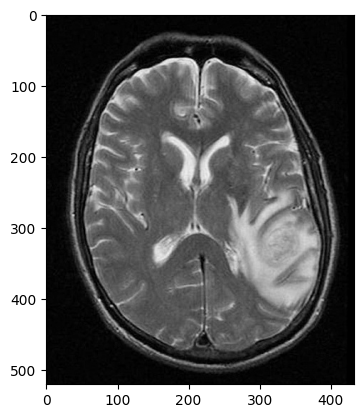

In [18]:
# Displaying the images
# display with tumour image
img=mpimg.imread('/content/brain_tumor_dataset/yes/Y61.jpg')
imgplot = plt.imshow(img)
plt.show()

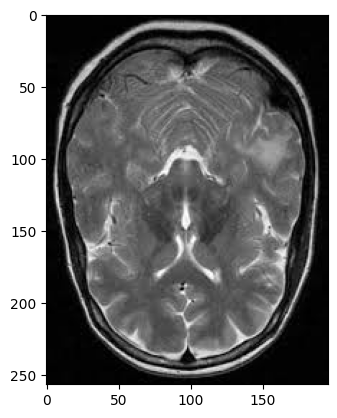

In [19]:
# display without tumour image
img=mpimg.imread('/content/brain_tumor_dataset/no/N6.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# As images are of differnent size we need to take care of this during image processing
#IMAGE PROCESSING
#1. Resize image
#2. convert images to numpy arrays



In [21]:
# convert images to numpy arrays
with_tumour_path = '/content/brain_tumor_dataset/yes/'

data = []

for img_file in with_tumour_files:
  image = Image.open(with_tumour_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



  without_tumour_path = '/content/brain_tumor_dataset/no/'



for img_file in without_tumour_files:
  image = Image.open(without_tumour_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)






In [22]:
type(data)

list

In [23]:
data[0]


array([[[3, 3, 3],
        [6, 6, 6],
        [4, 4, 4],
        ...,
        [2, 2, 2],
        [0, 0, 0],
        [0, 0, 0]],

       [[6, 6, 6],
        [7, 7, 7],
        [4, 4, 4],
        ...,
        [2, 2, 2],
        [0, 0, 0],
        [0, 0, 0]],

       [[5, 5, 5],
        [4, 4, 4],
        [6, 6, 6],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [6, 6, 6],
        [4, 4, 4],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [6, 6, 6],
        [4, 4, 4],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[5, 5, 5],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
len(data)

253

In [27]:
# converting image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


In [30]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
# Split train test


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape,X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [35]:
X_train_scaled[0]

array([[[0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.04705882, 0.04705882, 0.04705882]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.04705882, 0.04705882, 0.04705882]],

       ...,

       [[0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0

In [36]:
# Now image processing part is completed , now lets build the convolution neural network(CNN)

In [37]:
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 2
model=keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [43]:
# compile neural network setting optimisation and loss fn.

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [45]:
# training the neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
6/6 [==============================] - 3s 119ms/step - loss: 1.0607 - acc: 0.6077 - val_loss: 0.6399 - val_acc: 0.7619
Epoch 2/10
6/6 [==============================] - 0s 27ms/step - loss: 0.6477 - acc: 0.7238 - val_loss: 0.5483 - val_acc: 0.8095
Epoch 3/10
6/6 [==============================] - 0s 26ms/step - loss: 0.5984 - acc: 0.7017 - val_loss: 0.4327 - val_acc: 0.8571
Epoch 4/10
6/6 [==============================] - 0s 27ms/step - loss: 0.5324 - acc: 0.7569 - val_loss: 0.4524 - val_acc: 0.8571
Epoch 5/10
6/6 [==============================] - 0s 26ms/step - loss: 0.4782 - acc: 0.8066 - val_loss: 0.3782 - val_acc: 0.8571
Epoch 6/10
6/6 [==============================] - 0s 29ms/step - loss: 0.4521 - acc: 0.8177 - val_loss: 0.3525 - val_acc: 0.8571
Epoch 7/10
6/6 [==============================] - 0s 26ms/step - loss: 0.4051 - acc: 0.8398 - val_loss: 0.3374 - val_acc: 0.8571
Epoch 8/10
6/6 [==============================] - 0s 26ms/step - loss: 0.3614 - acc: 0.8729 - va

In [46]:

# Model Evaluation

In [47]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =' , accuracy)

2/2 [==============================] - 0s 191ms/step - loss: 0.4657 - acc: 0.8431
Test Accuracy = 0.843137264251709


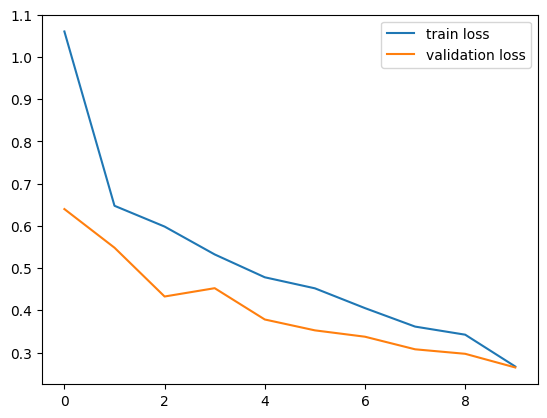

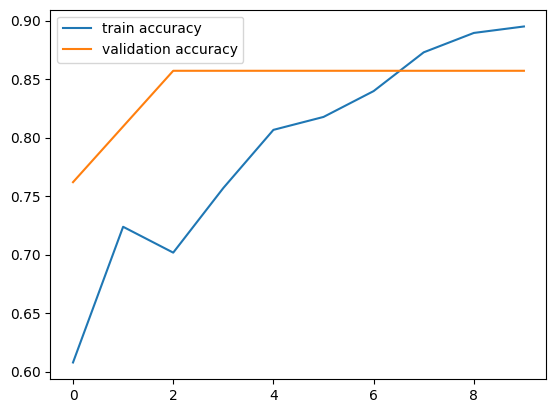

In [48]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



In [49]:

# Predictive System

Path of the image to be predicted: /content/images.jpeg


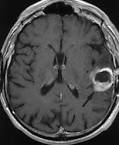

1/1 [==============================] - 0s 28ms/step
[[0.25370553 0.5700989 ]]
1
The person is suffering from Brain Tumour


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped= np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if (input_pred_label == 1):

  print('The person is suffering from Brain Tumour')

else:

  print('The person is not suffering from Brain tumour')

